<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_11_01_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea behind this project is to use deep neaural network to build an adding machine and measure the performance of the model architecture.

The numbers to be used are within the range [-10,10]

In [23]:
# Import the necessary libraries
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Create the Data

In [2]:
# Lets assign 3000 data points for training the model
N = 3000

# generate the synthetic data
my_data = torch.randint(low=-10,high=11, size=(N,2)).float()

# Assign data labels: The addition of numbers (column-wise addition)
# To create a column-oriented vector, use keepdim=True
labels = torch.sum(my_data,axis=1,keepdim=True)

In [8]:
# CHeck what has been done
for i in range(10):
    print(my_data[i], labels[i])

tensor([9., 2.]) tensor([11.])
tensor([-3., -2.]) tensor([-5.])
tensor([ 2., -9.]) tensor([-7.])
tensor([-6., -3.]) tensor([-9.])
tensor([1., 9.]) tensor([10.])
tensor([10., -2.]) tensor([8.])
tensor([-5.,  5.]) tensor([0.])
tensor([3., 7.]) tensor([10.])
tensor([ 4., -5.]) tensor([-1.])
tensor([-9., 10.]) tensor([1.])


In [5]:
print(my_data.shape)
print(labels.shape)

torch.Size([3000, 2])
torch.Size([3000, 1])


In [7]:
# The number of unique integers geenerated from the sum of our random numbers
torch.unique(labels).shape

torch.Size([41])

In [27]:
# Define a function to create a model
def createADDModel():

    # Define the model architecture
    ADDClassify = nn.Sequential(
        nn.Linear(2,30),    # Input layer (2 features only)
        nn.ReLU(),          # Activation Unit
        nn.Linear(30,1),    # One hidden Layer
        nn.ReLU(),          # Activation Unit Again
        nn.Linear(1,1),     # Output Layer (Single Number Prediction)
        )
    
    # Define the loss function
    lossfun = nn.MSELoss()

    # Define the optimizer
    optimizer = torch.optim.Adam(ADDClassify.parameters(), lr=0.01)

    # Final Model Output
    return ADDClassify, lossfun, optimizer

In [43]:
# Define a function to train the model
def function2TrainTheModel():

    # Define the number of epochs
    numepochs = 10

    # Initialize losses and accuracy
    losses = []

    # Loop over the epochs
    for epochi in range(numepochs):

        numloss = []

        # Iterate over each number
        for num, ans in zip(my_data, labels):

            # Forward Pass
            yHat = ADDClassify(num)

            # Compute losses
            loss = lossfun(yHat,ans)
            numloss.append(loss.item())

            # Back Propagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses.append(np.mean(numloss))

    # Final forward pass on all data
    with torch.no_grad():
        predictions = ADDClassify(my_data)
    
    trainAcc = 100*torch.mean((np.abs(predictions-labels)<1).float())

    test_data = torch.randint(low=-10, high=11, size=(N,2)).float()
    test_labels = torch.sum(test_data,axis=1,keepdim=True)

    # Evaluate model accuracy on test data
    with torch.no_grad():
        predictions = ADDClassify(test_data)

    testAcc = 100*torch.mean((np.abs(predictions-test_labels)<1).float())

    return losses, trainAcc, testAcc, ADDClassify

In [44]:
# Run the model once
ADDClassify, lossfun, optimizer = createADDModel()
losses, trainAcc, testAcc, ADDClassify = function2TrainTheModel()

In [45]:
print(trainAcc)
print(testAcc)

tensor(99.7667)
tensor(99.8333)


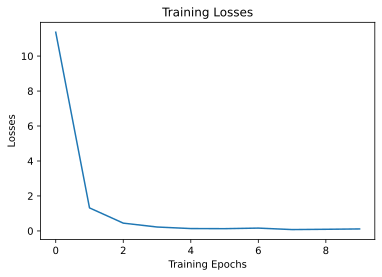

In [46]:
plt.plot(losses)
plt.xlabel("Training Epochs")
plt.ylabel("Losses")
plt.title("Training Losses")
plt.show()

In [47]:
# Now run the model 10 times to see the consistency
for i in range(10):

    ADDClassify, lossfun, optimizer = createADDModel()
    _, trainAcc, testAcc, ADDClassify = function2TrainTheModel()

    print("Model Instance: {}, Train Accuracy: {}%, Test Accuracy: {}%".format(i+1, trainAcc, testAcc))

Model Instance: 1, Train Accuracy: 99.76666259765625%, Test Accuracy: 99.83333587646484%
Model Instance: 2, Train Accuracy: 99.76666259765625%, Test Accuracy: 99.86666107177734%
Model Instance: 3, Train Accuracy: 99.86666107177734%, Test Accuracy: 99.73333740234375%
Model Instance: 4, Train Accuracy: 9.966667175292969%, Test Accuracy: 9.533332824707031%
Model Instance: 5, Train Accuracy: 99.76666259765625%, Test Accuracy: 99.76666259765625%
Model Instance: 6, Train Accuracy: 99.86666107177734%, Test Accuracy: 99.83333587646484%
Model Instance: 7, Train Accuracy: 99.86666107177734%, Test Accuracy: 99.66666412353516%
Model Instance: 8, Train Accuracy: 9.966667175292969%, Test Accuracy: 10.199999809265137%
Model Instance: 9, Train Accuracy: 99.76666259765625%, Test Accuracy: 99.56666564941406%
Model Instance: 10, Train Accuracy: 99.76666259765625%, Test Accuracy: 99.80000305175781%


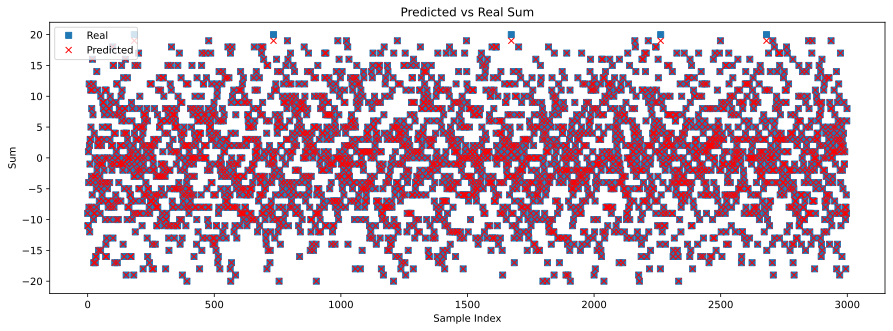

In [48]:
# Plots for final model

data = torch.randint(low=-10, high=11, size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# Evaluate the Model
with torch.no_grad():
    predictions= ADDClassify(data)

# Plot True and Predicted Values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,"s")
plt.plot(np.round(predictions.detach()), "rx")
plt.legend(["Real", "Predicted"])
plt.xlabel("Sample Index")
plt.ylabel("Sum")
plt.title("Predicted vs Real Sum")
plt.show()